In [1]:
import glob
from tqdm import tqdm
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import warnings
warnings.simplefilter("ignore")
data_list= []
phase = 'test'
origin_path = f'../medical_data/DRIVE/{phase}'
file_list = glob.glob(f'{origin_path}/**/*.tif',recursive=True)

In [3]:
img_list = []
gt_list = []
for file in tqdm(file_list) : 
    filedir = file.split('/')
    type_img = filedir[-2]
    img_name = filedir[-1].split('.')[0]
    img_id = "_".join([type_img,  img_name])

    if type_img == 'images':
        file_path = file
        gt_path = file.replace('images','1st_manual').replace('_training','_manual1').replace('tif','png')
        img = imread(file_path)
        gt = imread(gt_path)
        gt = gt > 0
        img_list.append(img)
        # print(np.unique(gt))
        gt_list.append(gt/255)
        

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 57.85it/s]


In [4]:
save_img = []
dst_path_img = os.path.join(origin_path.replace('DRIVE','AUG'), 'img')
dst_path_gt = os.path.join(origin_path.replace('DRIVE','AUG'), 'label')
os.makedirs(dst_path_img, exist_ok = True)
os.makedirs(dst_path_gt, exist_ok = True)
for img in zip(file_list, img_list, gt_list) :
    file_name = img[0]
    file_id = file_name.split('/')[-1].split('.')[0]
    img_save_path = os.path.join(dst_path_img,file_id + '.png')
    gt_save_path = os.path.join(dst_path_gt,file_id + '_gt.png')
    
    resize_img = resize(img[1], (592, 576)) # resize
    vertical_flip_img = np.flip(resize_img,axis=0) # resize and verticalflip
    resize_gt = resize(img[2], (592, 576)) # resize
    vertical_flip_gt = np.flip(resize_gt,axis=0) # resize and verticalflip
    
    imsave(img_save_path, resize_img)
    imsave(gt_save_path, resize_gt)
    imsave(img_save_path.replace('.png','_vfilp.png'), vertical_flip_img)
    imsave(gt_save_path.replace('_gt.png','_vfilp_gt.png'), vertical_flip_gt)
    

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

(592, 576)
[0 1]


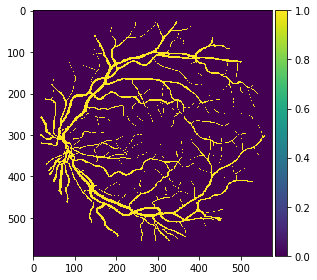

In [5]:
# test = imread('../medical_data/AUG/training/label/21_training_gt.png')
test = imread('../medical_data/AUG/test/label/01_test_vfilp_gt.png')
imshow(test)
print(test.shape)
print(np.unique(test))
plt.show()